# Analysis of Olympics Hosting Countries

In [1]:
# Installs the World Bank API and provides access to World Bank Data
# !pip install wbgapi

In [2]:
# Import Statements
import wbgapi as wb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
import seaborn as sns

sns.set_theme(style="darkgrid")

# Quick Tour on World Bank API

In [31]:
# Lets begin by looking into the documentation
help(wb)

Help on package wbgapi:

NAME
    wbgapi

DESCRIPTION
    wbgapi provides a comprehensive interface to the World Bank's data and
    metadata API with built-in pandas integration

PACKAGE CONTENTS
    __version__
    data
    economy
    economy_coder
    economy_metadata
    income
    lending
    region
    series
    series_metadata
    source
    time
    topic
    utils

CLASSES
    builtins.Exception(builtins.BaseException)
        APIError
            APIResponseError
        URLError
    builtins.dict(builtins.object)
        Coder
    builtins.object
        Featureset
        Metadata
        MetadataCollection
    
    class APIError(builtins.Exception)
     |  APIError(url, msg, code=None)
     |  
     |  Common base class for all non-exit exceptions.
     |  
     |  Method resolution order:
     |      APIError
     |      builtins.Exception
     |      builtins.BaseException
     |      builtins.object
     |  
     |  Methods defined here:
     |  
     |  __init__(sel

In [58]:
help(wb.data)

Help on module wbgapi.data in wbgapi:

NAME
    wbgapi.data - Access World Bank API data

FUNCTIONS
    DataFrame(series, economy='all', time='all', index=None, columns=None, mrv=None, mrnev=None, skipBlanks=False, labels=False, skipAggs=False, numericTimeKeys=False, timeColumns=False, params={}, db=None, **dimensions)
        Retrieve a 2-dimensional pandas dataframe. 
        
        Arguments:
            series:             a series identifier or list-like, e.g., SP.POP.TOTL
        
            economy:            an economy identifier or list-like, e.g., 'BRA' or ['USA', 'CAN', 'MEX']
        
            time:               a time identifier or list-like, e.g., 'YR2015' or range(2010,2020).
                                Both element keys and values are acceptable
        
            index:              name or list of dimensions for the DataFrame's index, e.g., 'economy'. If None then the function
                                will define the index based on your request. N

In [3]:
# List of available databases
# The API consists of more than 60 databases
display(wb.source.info())

id,name,code,concepts,lastupdated
1,Doing Business,DBS,3,2021-08-18
2,World Development Indicators,WDI,3,2022-02-15
3,Worldwide Governance Indicators,WGI,3,2021-09-27
5,Subnational Malnutrition Database,SNM,3,2016-03-21
6,International Debt Statistics,IDS,4,2022-01-14
11,Africa Development Indicators,ADI,3,2013-02-22
12,Education Statistics,EDS,3,2020-12-20
13,Enterprise Surveys,ESY,3,2021-04-02
14,Gender Statistics,GDS,3,2022-03-01
15,Global Economic Monitor,GEM,3,2020-07-27


In [64]:
# Change the database using the above ids, by default it is set to WDI (id=2)
wb.db = 6 # International Debt statistics
display(wb.series.info())

id,value
BM.GSR.TOTL.CD,"Imports of goods, services and primary income (current US$)"
BN.CAB.XOKA.CD,Current account balance (current US$)
BX.GRT.EXTA.CD.DT,"Grants, excluding technical cooperation (current US$)"
BX.GRT.TECH.CD.DT,Technical cooperation grants (current US$)
BX.GSR.TOTL.CD,"Exports of goods, services and primary income (current US$)"
BX.KLT.DINV.CD.DT,"Foreign direct investment, net inflows in reporting economy (DRS, current US$)"
BX.KLT.DREM.CD.DT,Primary income on FDI (current US$)
BX.PEF.TOTL.CD.DT,"Portfolio investment, equity (DRS, current US$)"
BX.TRF.PWKR.CD.DT,"Personal transfers and compensation of employees, received (current US$)"
DT.AMT.BLAT.CB.CD,"CB, bilateral (AMT, current US$)"


In [65]:
# Accessing database using simple queries
wb.db=2
display(wb.series.info(q='GDP'))

id,value
EG.GDP.PUSE.KO.PP,GDP per unit of energy use (PPP $ per kg of oil equivalent)
EG.GDP.PUSE.KO.PP.KD,GDP per unit of energy use (constant 2017 PPP $ per kg of oil equivalent)
EG.USE.COMM.GD.PP.KD,"Energy use (kg of oil equivalent) per $1,000 GDP (constant 2017 PPP)"
NY.GDP.DEFL.KD.ZG,"Inflation, GDP deflator (annual %)"
NY.GDP.DEFL.KD.ZG.AD,"Inflation, GDP deflator: linked series (annual %)"
NY.GDP.DEFL.ZS,GDP deflator (base year varies by country)
NY.GDP.DEFL.ZS.AD,GDP deflator: linked series (base year varies by country)
NY.GDP.DISC.CN,Discrepancy in expenditure estimate of GDP (current LCU)
NY.GDP.DISC.KN,Discrepancy in expenditure estimate of GDP (constant LCU)
NY.GDP.MKTP.CD,GDP (current US$)


In [26]:
# Getting the list of all the countries 
countries_list = wb.economy.DataFrame(skipAggs=False)
countries_list.head()

,name,aggregate,longitude,latitude,region,adminregion,lendingType,incomeLevel,capitalCity
id,,,,,,,,,
AFG,Afghanistan,False,69.1761,34.52280,SAS,SAS,IDX,LIC,Kabul
AGO,Angola,False,13.2420,-8.81155,SSF,SSA,IBD,LMC,Luanda
ALB,Albania,False,19.8172,41.33170,ECS,ECA,IBD,UMC,Tirane
ARG,Argentina,False,-58.4173,-34.61180,LCN,LAC,IBD,UMC,Buenos Aires
ARM,Armenia,False,44.5090,40.15960,ECS,ECA,IBD,UMC,Yerevan


In [48]:
# Encoding Country names
encoded_values = wb.economy.coder(['Argentina', 'Swaziland', 'South Korea', 'England'])
display(encoded_values)

ORIGINAL NAME,WBG NAME,ISO_CODE
Argentina,Argentina,ARG
Swaziland,Eswatini,SWZ
South Korea,"Korea, Rep.",KOR
England,United Kingdom,GBR


In [52]:
# Getting the GDP of countries
countries = ['BRA', 'USA', 'IND', 'CAN']
gdp_data = wb.data.DataFrame('NY.GDP.MKTP.CD', countries, labels=False)
gdp_data.head(25)

,YR1960,YR1961,YR1962,YR1963,YR1964,YR1965,YR1966,YR1967,YR1968,YR1969,...,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020
economy,,,,,,,,,,,,,,,,,,,,,
BRA,NaN,1.727594e+10,1.923175e+10,2.328771e+10,2.096373e+10,2.246552e+10,2.828332e+10,3.108639e+10,3.393046e+10,3.717164e+10,...,2.616157e+12,2.465228e+12,2.472819e+12,2.456044e+12,1.802212e+12,1.795693e+12,2.063515e+12,1.916934e+12,1.877824e+12,1.444733e+12
CAN,4.046172e+10,4.093495e+10,4.222745e+10,4.502999e+10,4.937752e+10,5.451518e+10,6.108838e+10,6.566866e+10,7.182981e+10,7.914841e+10,...,1.793327e+12,1.828366e+12,1.846597e+12,1.805750e+12,1.556509e+12,1.527995e+12,1.649266e+12,1.725329e+12,1.742015e+12,1.645423e+12
IND,3.702988e+10,3.923244e+10,4.216148e+10,4.842192e+10,5.648029e+10,5.955485e+10,4.586546e+10,5.013494e+10,5.308546e+10,5.844800e+10,...,1.823050e+12,1.827638e+12,1.856722e+12,2.039127e+12,2.103588e+12,2.294798e+12,2.651473e+12,2.701112e+12,2.870504e+12,2.660245e+12
USA,5.433000e+11,5.633000e+11,6.051000e+11,6.386000e+11,6.858000e+11,7.437000e+11,8.150000e+11,8.617000e+11,9.425000e+11,1.019900e+12,...,1.554258e+13,1.619701e+13,1.678485e+13,1.752716e+13,1.823830e+13,1.874508e+13,1.954298e+13,2.061186e+13,2.143322e+13,2.095303e+13


# Exploratory Data Analysis

In [4]:
# Importing Datasets

# TODO Replace it with Sambhav's scraped data set
summer_olympics_data = pd.read_excel("Datasets/summerolympics.xlsx")
winter_olympics_data = pd.read_excel("Datasets/winterolympics.xlsx")

olympics_costs = pd.read_csv("Datasets/olympicscosts.csv")

In [5]:
print("\nSummer Olympics")
display(summer_olympics_data.head(10))


Summer Olympics


,No.,Host City,Country,Continent,Year,Opening Day,Closing Day
0,I,Athens,Greece,Europe,1896,2022-04-06 00:00:00,2022-04-15 00:00:00
1,II,Paris,France,Europe,1900,2022-05-14 00:00:00,2022-10-28 00:00:00
2,III,St. Louis,United States,North America,1904,2022-07-01 00:00:00,2022-11-23 00:00:00
3,IV,London,United Kingdom,Europe,1908,2022-04-27 00:00:00,2022-10-31 00:00:00
4,V,Stockholm,Sweden,Europe,1912,2022-05-05 00:00:00,2022-07-22 00:00:00
5,VI,Berlin,Germany,Europe,1916,Cancelled due to World war I,NaN
6,VII,Antwerp,Belgium,Europe,1920,2022-04-20 00:00:00,2022-09-12 00:00:00
7,VIII,Paris,France,Europe,1924,2022-05-04 00:00:00,2022-07-27 00:00:00
8,IX,Amsterdam,Netherlands,Europe,1928,2022-05-17 00:00:00,2022-08-12 00:00:00
9,X,Los Angeles,United States,North America,1932,2022-07-30 00:00:00,2022-08-14 00:00:00


In [6]:
print("\nWinter Olympics")
display(winter_olympics_data.head())


Winter Olympics


,No.,Host City,Country,Continent,Year,Opening Day,Closing Day
0,I,Chamonix,France,Europe,1924,2022-01-25 00:00:00,2022-02-04 00:00:00
1,II,St. Moritz,Switzerland,Europe,1928,2022-02-11 00:00:00,2022-02-19 00:00:00
2,III,Lake Placid,United States,North America,1932,2022-02-04 00:00:00,2022-02-15 00:00:00
3,IV,Garmisch-Partenkirchen,Germany,Europe,1936,2022-02-06 00:00:00,2022-02-16 00:00:00
4,V,Sapporo,Japan,Asia,1940,Cancelled due to World war II,NaN


# Q1. Which countries have hosted Olympics and how many times?

In [7]:
# Getting the distinct country Names
summer_host_countries = summer_olympics_data['Country'].unique()
winter_host_countries = winter_olympics_data['Country'].unique()

# Handling rows with null values
winter_olympics_data.dropna(inplace=True)
summer_olympics_data.dropna(inplace=True)

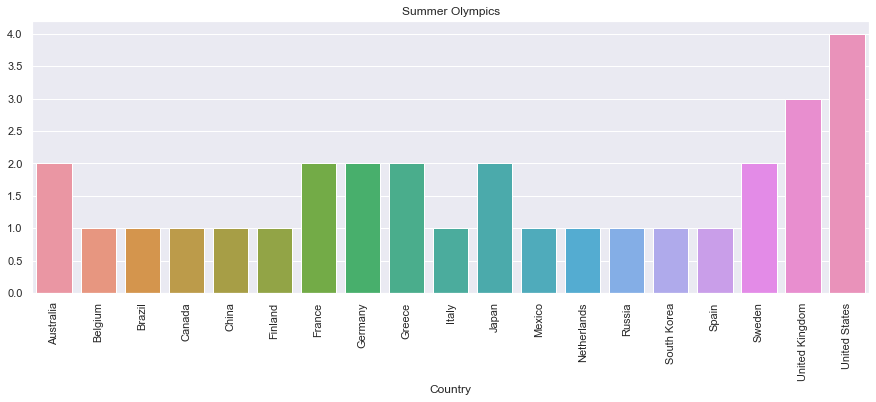

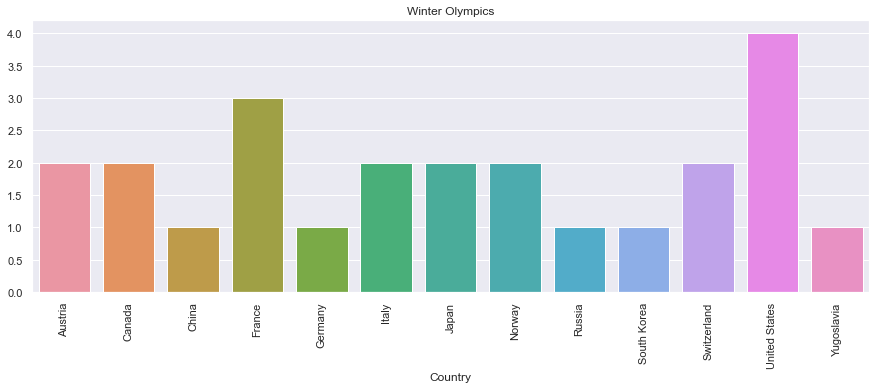

In [8]:
# Creating a date object
todays_date = date.today()

columns = ['Country','Year']
alias_names = {'West Germany':'Germany', 'Soviet Union':'Russia', 'USSR':'Russia'}

summer_olympics_data[columns[0]] = summer_olympics_data[columns[0]].replace(alias_names)

summer_filtered = summer_olympics_data[summer_olympics_data[columns[1]] <= todays_date.year][columns]
winter_filtered = winter_olympics_data[winter_olympics_data[columns[1]] <= todays_date.year][columns]

# Number of times each countries hosted the olympics
summer_count = summer_filtered.groupby(columns[0])[columns[0]].count() 
winter_count = winter_filtered.groupby(columns[0])[columns[0]].count()

sns.set(rc = {'figure.figsize':(15,5)})

# Summer Olympics
summer_plot = sns.barplot(x=summer_count.index, y=summer_count.values)
summer_plot.set_xticklabels(summer_plot.get_xticklabels(),rotation = 90)
summer_plot.set_title('Summer Olympics')
plt.show()

print()

# Winter Olympics
winter_plot = sns.barplot(x=winter_count.index, y=winter_count.values)
winter_plot.set_xticklabels(winter_plot.get_xticklabels(),rotation = 90)
winter_plot.set_title('Winter Olympics')
plt.show()

# Q2. How many countries have hosted Olympics till now?

In [9]:
summer_hosts = summer_filtered[columns[0]].unique()
winter_hosts = winter_filtered[columns[0]].unique()

distinct_countries = [*summer_hosts, *winter_hosts]
countries_set = set(distinct_countries)

print("\nNumber of Countries hosted Olympics: ", len(countries_set))


Number of Countries hosted Olympics:  23


# Q3. What are the top 10 expensive olympic games conducted till date?

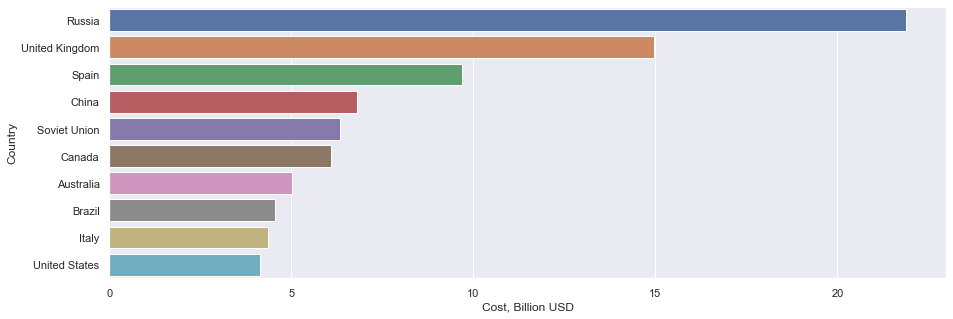

In [25]:
col_name = "Cost, Billion USD"
olympics_costs[col_name] = olympics_costs[col_name].astype(float).fillna(olympics_costs[col_name].median())
expensive_olympics = olympics_costs.sort_values(col_name, ascending=False).nlargest(10, col_name)

hplot = sns.barplot(x=col_name, y="Country", data=expensive_olympics, ci=None)

# Q4. Comparision between Summer & Winter Olympics costs over the years

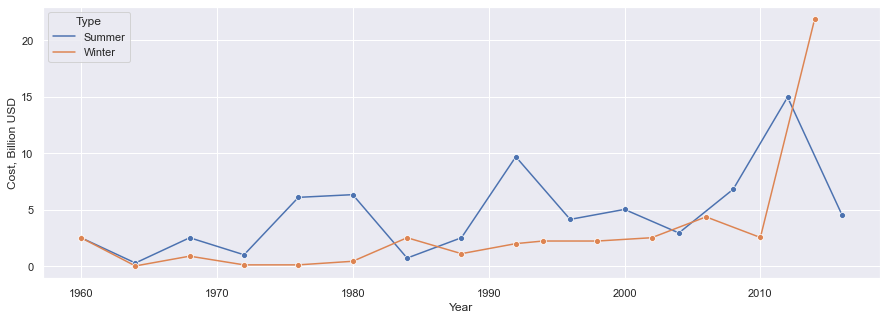

In [11]:
line_plot = sns.lineplot(data=olympics_costs, x="Year", y=col_name, hue="Type", marker='o')

# Q5. Which is the most Expensive Summer and Winter Game?

In [47]:
summer_games = olympics_costs[olympics_costs['Type']=='Summer']
winter_games = olympics_costs[olympics_costs['Type']=='Winter']

expensive_summer = summer_games[summer_games[col_name] == summer_games[col_name].max()]
expensive_winter = winter_games[winter_games[col_name] == winter_games[col_name].max()]

print("\nMost Expensive Summer Olympic game : {}, Cost in Billions : {}".format(expensive_summer['Games'].iloc[0],\
                                                                                expensive_summer[col_name].iloc[0]))
print("\nMost Expensive Winter Olympic game : {}, Cost in Billions : {}".format(expensive_winter['Games'].iloc[0],\
                                                                                expensive_winter[col_name].iloc[0]))


Most Expensive Summer Olympic game : London, Cost in Billions : 14.957

Most Expensive Winter Olympic game : Sochi, Cost in Billions : 21.89


# Q6. Are Winter Games costlier than Summer Games?

In [49]:
winter_median = winter_games[col_name].median()
summer_median = summer_games[col_name].median()

winter_average = winter_games[col_name].mean()
summer_average = summer_games[col_name].mean()

print("\nCost of Summer Games(in Billions) - Median : {}, Average : {}".format(summer_median, summer_average))
print("\nCost of Winter Games(in Billions) - Median : {}, Average : {}".format(winter_median, winter_average))


Cost of Summer Games(in Billions) - Median : 5.5595, Average : 5.9742500000000005

Cost of Winter Games(in Billions) - Median : 1.997, Average : 3.112076923076923


 # Economics Indicators
 
GDP - Gross Domestic Product

HDI - Human Development Index

Foreign Investment

Income Group

Population

Tourism

Trade

In [57]:
host_country_codes = wb.economy.coder(countries_set)
country_codes_map = dict(host_country_codes)
print(country_codes_map)

{'China': 'CHN', 'France': 'FRA', 'Mexico': 'MEX', 'Italy': 'ITA', 'Canada': 'CAN', 'Austria': 'AUT', 'Norway': 'NOR', 'Sweden': 'SWE', 'Germany': 'DEU', 'Spain': 'ESP', 'Greece': 'GRC', 'Netherlands': 'NLD', 'Japan': 'JPN', 'Belgium': 'BEL', 'Finland': 'FIN', 'Russia': 'RUS', 'South Korea': 'KOR', 'United States': 'USA', 'Australia': 'AUS', 'Yugoslavia': None, 'Switzerland': 'CHE', 'United Kingdom': 'GBR', 'Brazil': 'BRA'}


In [82]:
host_gdp_data = wb.data.DataFrame('NY.GDP.MKTP.CD', country_codes_map.values(), time=range(1960, 2020));
host_gdp_data.rename(columns=lambda x: x[2:], inplace=True)
host_gdp_data.T.head()

economy,AUS,AUT,BEL,BRA,CAN,CHE,CHN,DEU,ESP,FIN,...,GRC,ITA,JPN,KOR,MEX,NLD,NOR,RUS,SWE,USA
1960,1.860679e+10,6.592694e+09,1.165872e+10,NaN,4.046172e+10,9.522747e+09,5.971647e+10,NaN,1.207213e+10,5.224102e+09,...,4.335186e+09,4.038529e+10,4.430734e+10,3.958191e+09,1.304000e+10,1.227673e+10,5.163272e+09,NaN,1.582259e+10,5.433000e+11
1961,1.968306e+10,7.311750e+09,1.240015e+10,1.727594e+10,4.093495e+10,1.071271e+10,5.005687e+10,NaN,1.383430e+10,5.921659e+09,...,4.961400e+09,4.484276e+10,5.350862e+10,2.417558e+09,1.416000e+10,1.349383e+10,5.632461e+09,NaN,1.721269e+10,5.633000e+11
1962,1.992272e+10,7.756110e+09,1.326402e+10,1.923175e+10,4.222745e+10,1.187998e+10,4.720936e+10,NaN,1.613855e+10,6.340581e+09,...,5.213048e+09,5.038389e+10,6.072302e+10,2.814319e+09,1.520000e+10,1.464706e+10,6.066977e+09,NaN,1.866725e+10,6.051000e+11
1963,2.153993e+10,8.374175e+09,1.426002e+10,2.328771e+10,4.502999e+10,1.306364e+10,5.070680e+10,NaN,1.907491e+10,6.885920e+09,...,5.895278e+09,5.771074e+10,6.949813e+10,3.988785e+09,1.696000e+10,1.589124e+10,6.510240e+09,NaN,2.020487e+10,6.386000e+11
1964,2.380110e+10,9.169984e+09,1.596011e+10,2.096373e+10,4.937752e+10,1.448056e+10,5.970834e+10,NaN,2.134384e+10,7.766655e+09,...,6.669673e+09,6.317542e+10,8.174901e+10,3.458939e+09,2.008000e+10,1.869938e+10,7.159203e+09,NaN,2.253242e+10,6.858000e+11


In [84]:
host_gdp_data.T.describe()

economy,AUS,AUT,BEL,BRA,CAN,CHE,CHN,DEU,ESP,FIN,...,GRC,ITA,JPN,KOR,MEX,NLD,NOR,RUS,SWE,USA
count,6.000000e+01,6.000000e+01,6.000000e+01,5.900000e+01,6.000000e+01,5.000000e+01,6.000000e+01,5.000000e+01,6.000000e+01,6.000000e+01,...,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,3.200000e+01,6.000000e+01,6.000000e+01
mean,4.512807e+11,1.784475e+11,2.197768e+11,7.002762e+11,6.721880e+11,3.152760e+11,2.374242e+12,2.016425e+12,5.685431e+11,1.144335e+11,...,1.148756e+11,9.847706e+11,2.812474e+12,4.813033e+11,4.631672e+11,3.707427e+11,1.657315e+11,9.564339e+11,2.381820e+11,7.459189e+12
std,4.822337e+11,1.534105e+11,1.813561e+11,7.789787e+11,5.967024e+11,2.445705e+11,3.944559e+12,1.219585e+12,5.269522e+11,9.513276e+10,...,9.970359e+10,7.855375e+11,2.151513e+12,5.402118e+11,4.425626e+11,3.169199e+11,1.645335e+11,6.656742e+11,1.868764e+11,6.309513e+12
min,1.860679e+10,6.592694e+09,1.165872e+10,1.727594e+10,4.046172e+10,9.522747e+09,4.720936e+10,2.158384e+11,1.207213e+10,5.224102e+09,...,4.335186e+09,4.038529e+10,4.430734e+10,2.417558e+09,1.304000e+10,1.227673e+10,5.163272e+09,1.959071e+11,1.582259e+10,5.433000e+11
25%,9.524519e+10,3.884173e+10,6.326691e+10,1.411863e+11,1.704777e+11,1.129371e+11,1.482011e+11,7.825503e+11,1.104013e+11,2.831667e+10,...,2.773223e+10,2.184291e+11,5.110629e+11,2.122425e+10,7.936062e+10,9.699800e+10,3.144478e+10,4.025810e+11,7.866738e+10,1.649989e+12
50%,3.055473e+11,1.499014e+11,1.847764e+11,3.426092e+11,5.711133e+11,2.836917e+11,3.543130e+11,2.069974e+12,4.699163e+11,1.061795e+11,...,8.853007e+10,9.968097e+11,3.102250e+12,2.651474e+11,2.626065e+11,2.901205e+11,1.112127e+11,5.728651e+11,2.154508e+11,5.802362e+12
75%,6.343935e+11,3.046718e+11,3.727955e+11,8.874201e+11,1.063295e+12,4.811035e+11,2.038002e+12,3.265226e+12,1.088641e+12,1.990400e+11,...,1.965413e+11,1.811395e+12,4.894086e+12,8.286065e+11,8.060495e+11,6.641519e+11,2.756048e+11,1.537238e+12,3.868931e+11,1.241946e+13
max,1.576335e+12,4.549459e+11,5.430085e+11,2.616157e+12,1.846597e+12,7.355393e+11,1.427994e+13,3.975347e+12,1.625225e+12,2.845540e+11,...,3.544608e+11,2.398857e+12,6.272363e+12,1.724846e+12,1.315351e+12,9.479977e+11,5.227615e+11,2.292473e+12,5.868418e+11,2.143322e+13
